# Multi-Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

## 50 Startups

In [2]:
start=pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/5.Multi Linear Regression/5.Multi Linear Regression/50_Startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
start.rename(columns={"R&D Spend":"RnD","Administration":"Admin","Marketing Spend":"Marketing"}, inplace=True)
start.head()

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
start.shape

(50, 5)

In [5]:
start.isna().sum()

RnD          0
Admin        0
Marketing    0
State        0
Profit       0
dtype: int64

In [6]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#looking for duplicates
start[start.duplicated()]

,RnD,Admin,Marketing,State,Profit


In [8]:
#Droping 'State' Column as it is will not contribute to predict
start = start.drop(["State"], axis = 1)
start.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
start.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


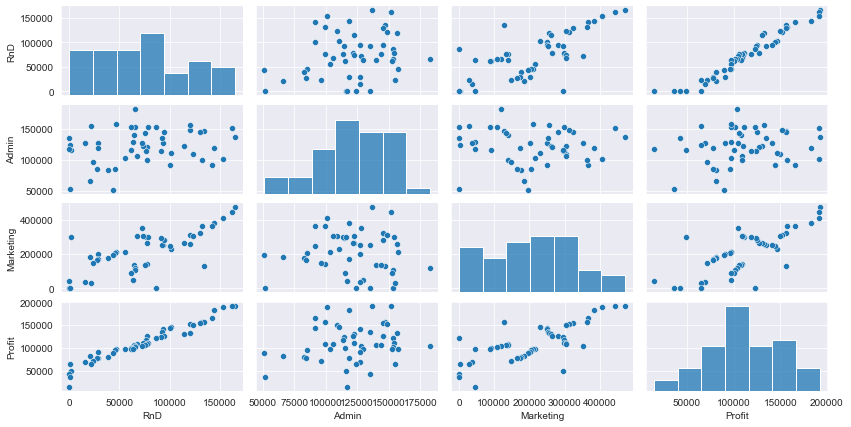

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(start,height=1.5,aspect=2);

### Preparing a Model

In [11]:
#built model
model=smf.ols("Profit~RnD+Admin+Marketing",data=start).fit()

In [12]:
#Coefficients
model.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [13]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept     7.626218
RnD          17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64 
 P_values is:  
 Intercept    1.057379e-09
RnD          2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64


Hypothesis Testing for variable contribution-                                                                 
**Assumptions & Test**                                                                                                         
assuming the significance level is 5% and confidence level 95%                                                           
∴ **α** = 5/100=0.05                                         
Null Hypothesis(**h0**)         -> **ß1=0**,i.e. Variable is **Dependent** and contributing.                                   
Alternate Hypothesis(**h1**) -> **ß1≠0**,i.e. Variable is **Independent** and not contributing.                                 

In [14]:
α=0.05
model.pvalues<α

Intercept     True
RnD           True
Admin        False
Marketing    False
dtype: bool

Here the p values for Admin and Marketing are greater than alpha value i.e **p>α**                                             
**Which means we fail to reject the Null Hypothesis(h0) and reject the alternate Hypothesis(h1)**                         
**∴ This proves that Admin and Marketing is zero and is Dependent.**                                         
**But First we try Collinearity**

### Simple Linear Regression Models

In [15]:
# to check SLR on insignificant variable individually and together
ml_admin=smf.ols('Profit~Admin',data =start).fit()  
#t and p-Values
print(ml_admin.tvalues,'\n','\n',ml_admin.pvalues)  

Intercept    3.040044
Admin        1.419493
dtype: float64 
 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [16]:
ml_market=smf.ols('Profit~Marketing',data =start).fit()  
#t and p-Values
print(ml_market.tvalues,'\n','\n',ml_market.pvalues)  

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [17]:
ml_am=smf.ols('Profit~Admin+Marketing',data =start).fit()  
#t and p-Values
print(ml_am.tvalues,'\n','\n',ml_am.pvalues)  

Intercept    1.142741
Admin        2.467779
Marketing    8.281039
dtype: float64 
 
 Intercept    2.589341e-01
Admin        1.729198e-02
Marketing    9.727245e-11
dtype: float64


### Model Accuracy Metrics

In [18]:
acc_1=model.rsquared,model.rsquared_adj,model.aic
acc_1

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

In [19]:
start.head(1)

,RnD,Admin,Marketing,Profit
0,165349.2,136897.8,471784.1,192261.83


### Collinearity

In [20]:
rsq_RnD = smf.ols('RnD~Admin+Marketing',data=start).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD)

rsq_Admin = smf.ols('Admin~RnD+Marketing',data=start).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

rsq_Marketing = smf.ols('Marketing~RnD+Admin',data=start).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)

df = {'Variables':["RnD","Admin","Marketing"],'VIF':[vif_RnD,vif_Admin,vif_Marketing]}
Vif_frame = pd.DataFrame(df)  
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


VIF below 10 is acceptable so there is no collinearity

### Model Validation Techniques
### Residual Analysis
#### 1.Test for Normality of Residuals (Q-Q Plot)

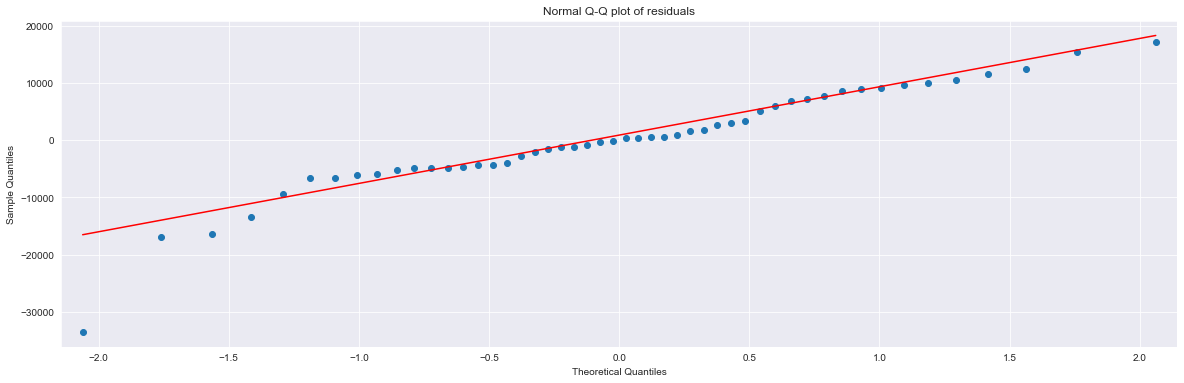

In [21]:
#to plot the errors on line ,line=q means to create a ols best line as per quartiles 
fig, ax = plt.subplots(figsize=(20,6))
qqplot=sm.qqplot(model.resid,line='q',ax=ax) 
plt.title("Normal Q-Q plot of residuals")
plt.show();

In [22]:
#to check the outlayer value it will return observations
list(np.where(model.resid>10000)),list(np.where(model.resid<-10000))

([array([10, 12, 16, 36, 38, 45], dtype=int64)],
 [array([14, 15, 48, 49], dtype=int64)])

#### 2.Residual Plot for Homoscedasticity(Fitted Vs Residuals) (Y^ Vs ei)

In [23]:
# to standardize the value for plotting by creating a std function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

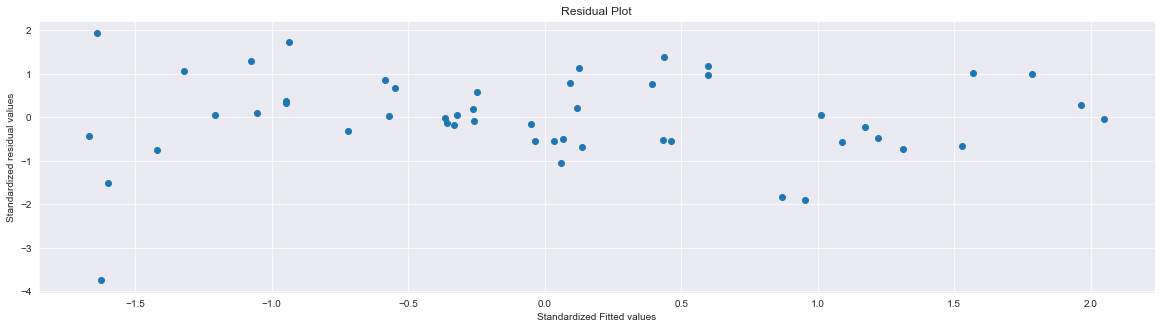

In [24]:
fig = plt.figure(figsize=(20,5))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show();

NO patterns are visible.
#### 3.Residual Vs Regressors (xi Vs ei)
 plotting for each variable

eval_env: 1


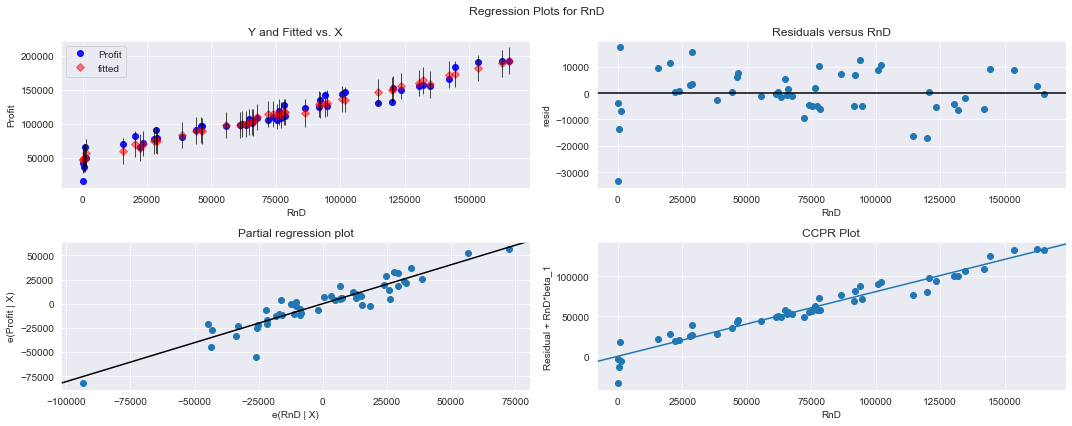

In [25]:
#for RnD
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model,"RnD", fig=fig_vol)
plt.show();

eval_env: 1


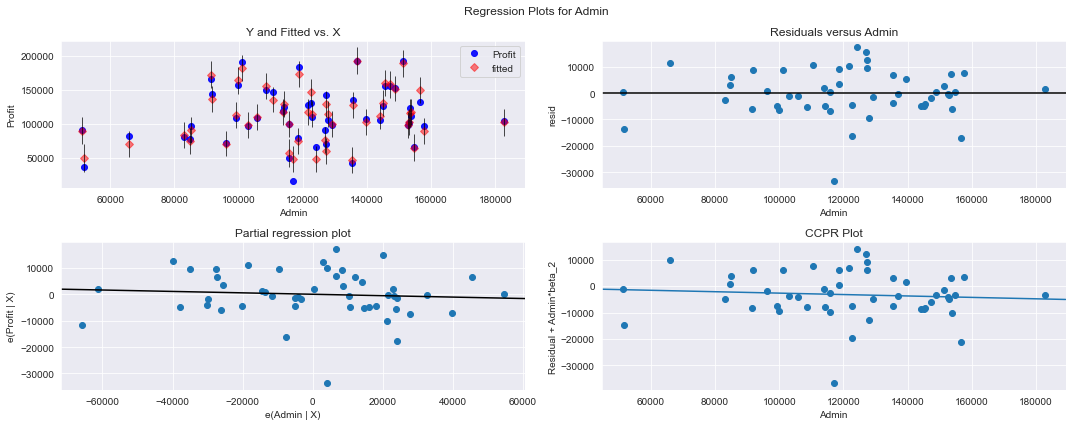

In [26]:
#for Admin
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model,"Admin", fig=fig_vol)
plt.show();

eval_env: 1


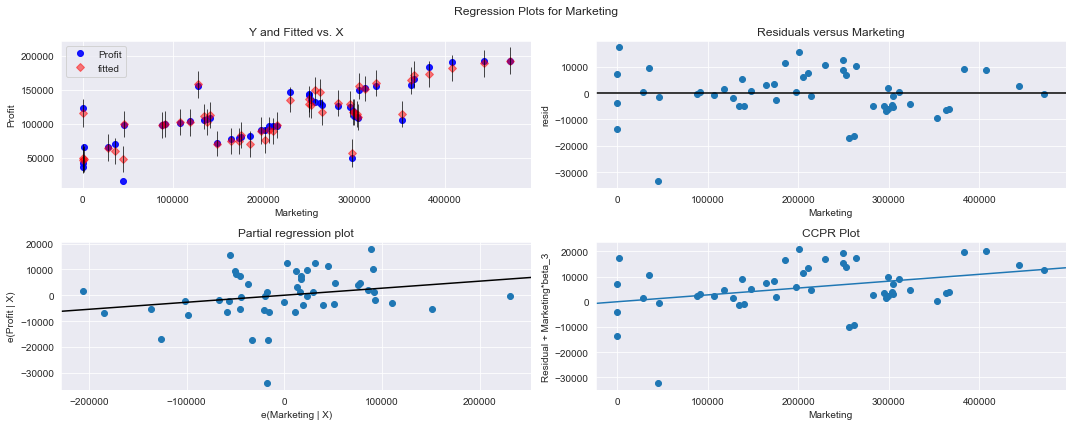

In [27]:
#for Marketing
fig_vol = plt.figure(figsize=(15,6))
fig = sm.graphics.plot_regress_exog(model,"Marketing", fig=fig_vol)
plt.show();

No patterns are visible so all variables are significant.
### Model Deletion Diagnostics
Detecting outliers
#### 1.Cook's Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

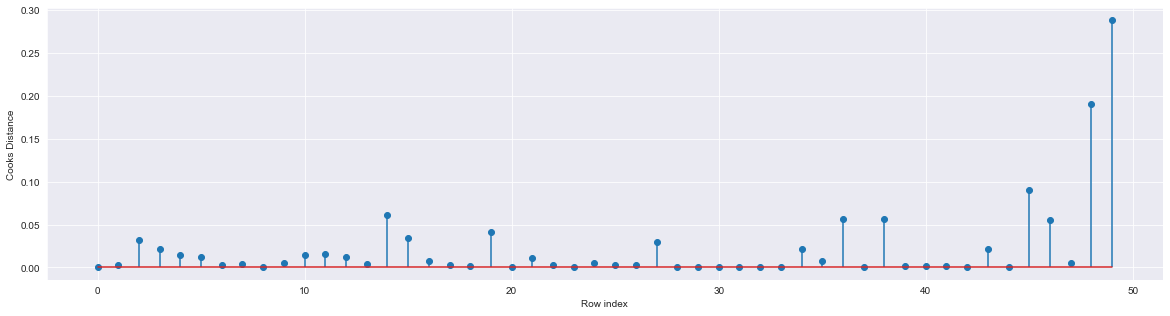

In [29]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

Data point with Cook's Distance above 0.5 is highly influencing.

#### 2.High Influence Points-Hat Points

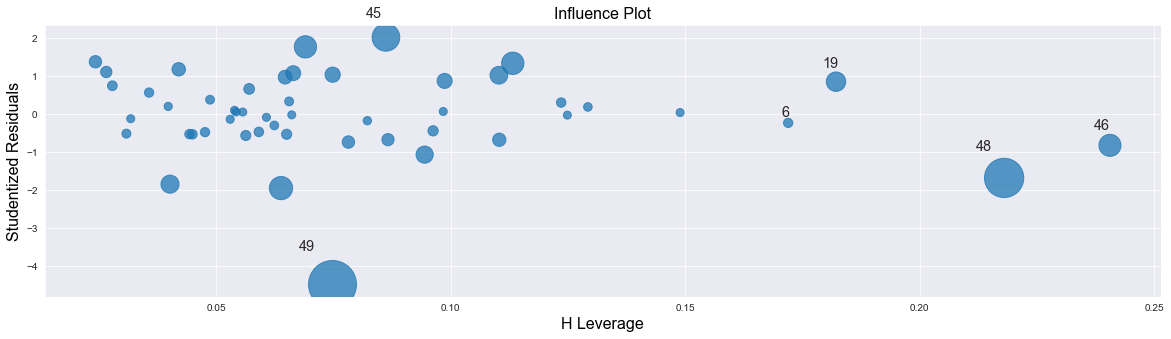

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
influence_plot(model,ax=ax)
plt.show();

In [32]:
#to set a leverge 
k = start.shape[1] # k-columns
n = start.shape[0]  # n-obs/rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.30000000000000004

Data point with leverage above 0.05 are influencing.                                             
From the above plot, it is evident that data point 19,45,46,48 and 49 are the influencers.

In [33]:
# to actually check the row values of outliers
start[start.index.isin([6,19,45,46,48,49])]

,RnD,Admin,Marketing,Profit
6,134615.46,147198.87,127716.82,156122.51
19,86419.70,153514.11,0.00,122776.86
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [34]:
#to compare the outlier value with the other values
start.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


the values can be compared and seen that it varies a lot so we delete the outliers and improve our model by building one.
### Improving the model

In [35]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new=start.drop(start.index[[6,19,45,46,48,49]],axis=0).reset_index()

In [36]:
#Drop the original index
start_new=start_new.drop(['index'],axis=1)

In [37]:
start_new.shape,start.shape

((44, 4), (50, 4))

In [38]:
#built new model
model1=smf.ols("Profit~RnD+Admin+Marketing",data=start_new).fit()

In [39]:
#model1 accrucy
acc_2=(model1.rsquared,model1.rsquared_adj,model1.aic)
acc_2

(0.9629384741330514, 0.9601588596930303, 909.4651809080262)

In [40]:
#to check if model is improved from before model
acc_2[0]>acc_1[0],acc_2[1]>acc_1[1],acc_2[2]<acc_1[2]

(True, True, True)

**This proves the model is improved.                                                                
Try cook's distance once again.**

In [41]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

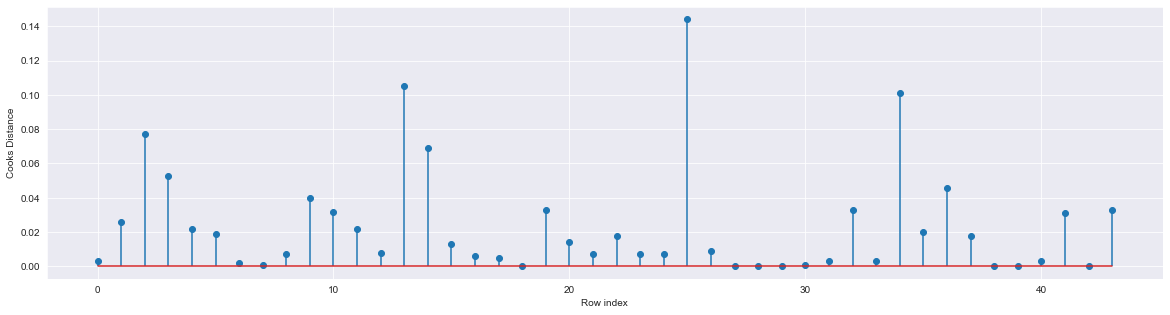

In [42]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(25, 0.14402390388307265)

In [44]:
# to actually check the row values of outliers
start_new[start_new.index.isin([25])]

,RnD,Admin,Marketing,Profit
25,72107.6,127864.55,353183.81,105008.31


In [45]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new1=start_new.drop(start_new.index[[25]],axis=0).reset_index()

In [46]:
#Drop the original index
start_new1=start_new1.drop(['index'],axis=1)

In [47]:
start_new1.shape,start_new.shape

((43, 4), (44, 4))

In [48]:
#built new model
model2=smf.ols("Profit~RnD+Admin+Marketing",data=start_new1).fit()

In [49]:
#model2 accrucy
acc_3=(model2.rsquared,model2.rsquared_adj,model2.aic)
acc_3

(0.9657544937524853, 0.9631202240411381, 886.4485541831048)

In [50]:
#to check if model is improved from before model
acc_3[0]>acc_2[0],acc_3[1]>acc_2[1],acc_3[2]<acc_2[2]

(True, True, True)

**This improves our model and we continue the process till we reach its peak**

In [51]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

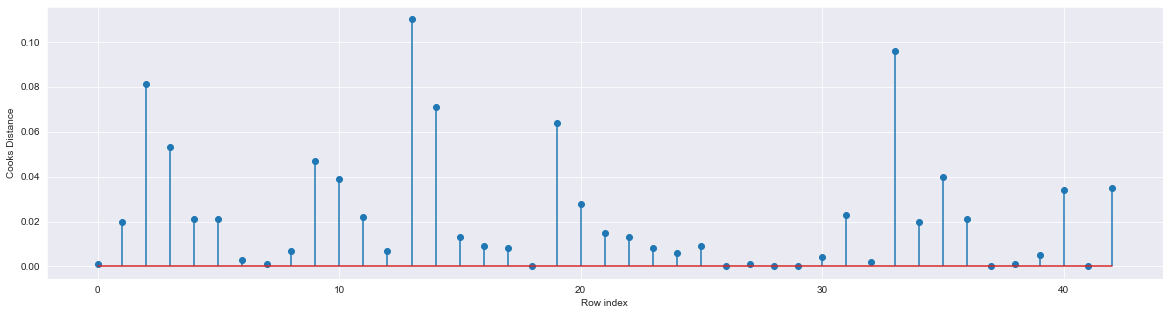

In [52]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start_new1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(13, 0.1095205900262192)

In [54]:
# to actually check the row values of outliers
start_new1[start_new1.index.isin([13])]

,RnD,Admin,Marketing,Profit
13,119943.24,156547.42,256512.92,132602.65


In [55]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new2=start_new1.drop(start_new1.index[[13]],axis=0).reset_index()

In [56]:
#Drop the original index
start_new2=start_new2.drop(['index'],axis=1)

In [57]:
start_new2.shape,start_new1.shape

((42, 4), (43, 4))

In [58]:
#built new model
model3=smf.ols("Profit~RnD+Admin+Marketing",data=start_new2).fit()

In [59]:
#model2 accrucy
acc_4=(model3.rsquared,model3.rsquared_adj,model3.aic)
acc_4

(0.9698921294896853, 0.9675151923441341, 861.419779267338)

In [60]:
#to check if model is improved from before model
acc_4[0]>acc_3[0],acc_4[1]>acc_3[1],acc_4[2]<acc_3[2]

(True, True, True)

In [61]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

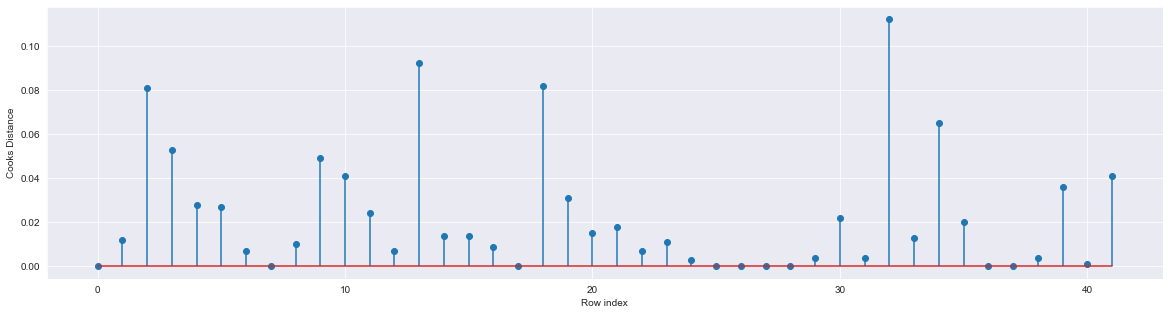

In [62]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start_new2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(32, 0.1121462319873992)

In [64]:
# to actually check the row values of outliers
start_new2[start_new2.index.isin([32])]

,RnD,Admin,Marketing,Profit
32,28663.76,127056.21,201126.82,90708.19


In [65]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new3=start_new2.drop(start_new2.index[[32]],axis=0).reset_index()

In [66]:
#Drop the original index
start_new3=start_new3.drop(['index'],axis=1)

In [67]:
start_new3.shape,start_new2.shape

((41, 4), (42, 4))

In [68]:
#built new model
model4=smf.ols("Profit~RnD+Admin+Marketing",data=start_new3).fit()

In [69]:
#model2 accrucy
acc_5=(model4.rsquared,model4.rsquared_adj,model4.aic)
acc_5

(0.9720649947904295, 0.9697999943680319, 838.4761080212162)

In [70]:
#to check if model is improved from before model
acc_5[0]>acc_4[0],acc_5[1]>acc_4[1],acc_5[2]<acc_4[2]

(True, True, True)

In [71]:
model_influence = model4.get_influence()
(c, _) = model_influence.cooks_distance

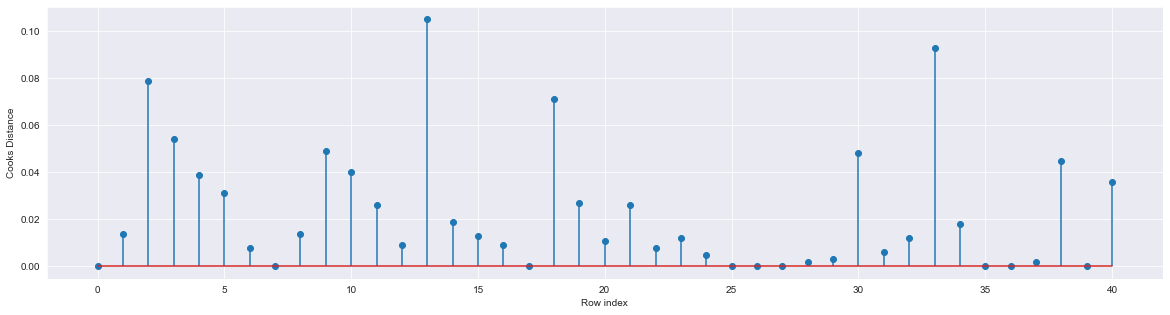

In [72]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start_new3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [73]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(13, 0.10535376498955795)

In [74]:
# to actually check the row values of outliers
start_new3[start_new3.index.isin([13])]

,RnD,Admin,Marketing,Profit
13,114523.61,122616.84,261776.23,129917.04


In [75]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new4=start_new3.drop(start_new3.index[[13]],axis=0).reset_index()

In [76]:
#Drop the original index
start_new4=start_new4.drop(['index'],axis=1)

In [77]:
start_new4.shape,start_new3.shape

((40, 4), (41, 4))

In [78]:
#built new model
model5=smf.ols("Profit~RnD+Admin+Marketing",data=start_new4).fit()

In [79]:
#model2 accrucy
acc_6=(model5.rsquared,model5.rsquared_adj,model5.aic)
acc_6

(0.977167933293994, 0.9752652610684935, 811.0272042142763)

In [80]:
#to check if model is improved from before model
acc_6[0]>acc_5[0],acc_6[1]>acc_5[1],acc_6[2]<acc_5[2]

(True, True, True)

In [81]:
model_influence = model5.get_influence()
(c, _) = model_influence.cooks_distance

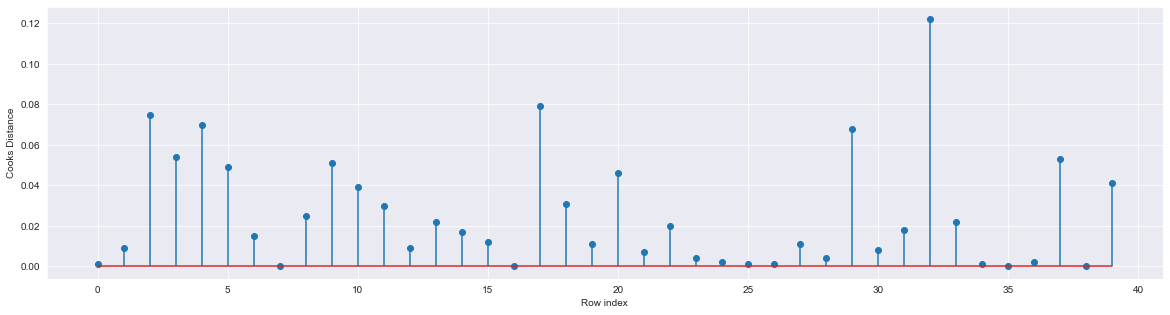

In [82]:
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(start_new4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [83]:
#index and value of influencer where c is max
(np.argmax(c),np.max(c))

(32, 0.12159316387903846)

In [84]:
# to actually check the row values of outliers
start_new4[start_new4.index.isin([32])]

,RnD,Admin,Marketing,Profit
32,20229.59,65947.93,185265.1,81229.06


In [85]:
#Deleting the outlier row[0] and reseting the cloumn index (reset_index())
start_new5=start_new4.drop(start_new4.index[[32]],axis=0).reset_index()

In [86]:
#Drop the original index
start_new5=start_new5.drop(['index'],axis=1)

In [87]:
start_new5.shape,start_new4.shape

((39, 4), (40, 4))

In [88]:
#built new model
model6=smf.ols("Profit~RnD+Admin+Marketing",data=start_new5).fit()

In [89]:
#model2 accrucy
acc_7=(model6.rsquared,model6.rsquared_adj,model6.aic)
acc_7

(0.9781096849234914, 0.9762333722026478, 789.3050605630741)

In [90]:
#to check if model is improved from before model
acc_7[0]>acc_6[0],acc_7[1]>acc_6[1],acc_7[2]<acc_6[2]

(True, True, True)

**The model is improved enough to predict more could lead to less data points.                                               
So we stick to Model6 and work with future predictions**

### Final Model

In [91]:
#final model
final_model=smf.ols("Profit~RnD+Admin+Marketing",data=start_new5).fit()

In [92]:
#model accrucy
final_acc=(final_model.rsquared,final_model.rsquared_adj,final_model.aic)
final_acc

(0.9781096849234914, 0.9762333722026478, 789.3050605630741)

In [93]:
#to check if accuracy is same
final_acc[0]==acc_7[0],final_acc[1]==acc_7[1],final_acc[2]==acc_7[2]

(True, True, True)

In [94]:
r2 = {"Model":["First","Second","Third","Fourth","Fifth","Sixth","Seventh","Final"],
             "R_Square":[acc_1[0],acc_2[0],acc_3[0],acc_4[0],acc_5[0],acc_6[0],acc_7[0],final_acc[0]]}
rsquared = pd.DataFrame(r2)
rsquared

,Model,R_Square
0,First,0.950746
1,Second,0.962938
2,Third,0.965754
3,Fourth,0.969892
4,Fifth,0.972065
5,Sixth,0.977168
6,Seventh,0.978110
7,Final,0.978110


### Prediction

In [95]:
start_new5.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [96]:
# predicting by creating new df and dictionary for values
new_data=pd.DataFrame({"RnD":152769.84,"Admin":127538.49,"Marketing":794613.02},index=[1])
new_data

,RnD,Admin,Marketing
1,152769.84,127538.49,794613.02


In [97]:
#Predicting
final_model.predict(new_data)

1    192812.170204
dtype: float64

In [98]:
final_model.params

Intercept    52029.289921
RnD              0.800763
Admin           -0.031187
Marketing        0.028225
dtype: float64

In [99]:
#to check the correct value manually
# y^= ß0+ß1x1+ß2x2+ß3x3+ß4x4+ß5x5+ß6x6
# y^= 52029.289921+(0.800763*x1)+(-0.031187*x2)+( 0.028225*x3)
pred= 52029.289921+(0.800763*152769.84)+(-0.031187*127538.49)+( 0.028225*794613.02)
pred

192812.13491079

**The answers approximately match which shows the model can predict correctly.**